### Importing packages

In [1]:
from ml_package import LinearRegression, KNNClassifier
from ml_package.utils import (
    load_iris_data, normalize_data,
    split_data, explore_and_visualize,
    visualize_predictions
)
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Explore Data

In [2]:
df = load_iris_data()
# explore_and_visualize(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

### Preprocessing

In [4]:
X = df.drop(columns=["species", "target", "target_name"]).select_dtypes(include="number")
y = df["target"]
X_norm, scaler = normalize_data(X)
X_train, X_test, y_train, y_test = split_data(X_norm, y)

### Linear Regression

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = np.round(lr_model.predict(X_test)).astype(int)
lr_preds = np.clip(lr_preds, 0, 2)

### KNN Classifier

In [6]:
knn_model = KNNClassifier(k=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

### Evaluation

In [7]:
print("--- Evaluation Metrics ---")
print(f"Linear Regression Accuracy: {accuracy_score(y_test, lr_preds):.2f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, lr_model.predict(X_test)):.2f}")
print(f"KNN Classifier Accuracy: {accuracy_score(y_test, knn_preds):.2f}")

--- Evaluation Metrics ---
Linear Regression Accuracy: 0.99
Linear Regression MSE: 0.03
KNN Classifier Accuracy: 0.98


### Classification Reports

In [8]:

print("\nLinear Regression Classification Report:")
print(classification_report(y_test, lr_preds))
print("\nKNN Classifier Classification Report:")
print(classification_report(y_test, knn_preds))


Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.96      1.00      0.98        73
           2       1.00      0.97      0.99        80

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240


KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.95      0.99      0.97        73
           2       0.99      0.95      0.97        80

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



### Confusion Matrices

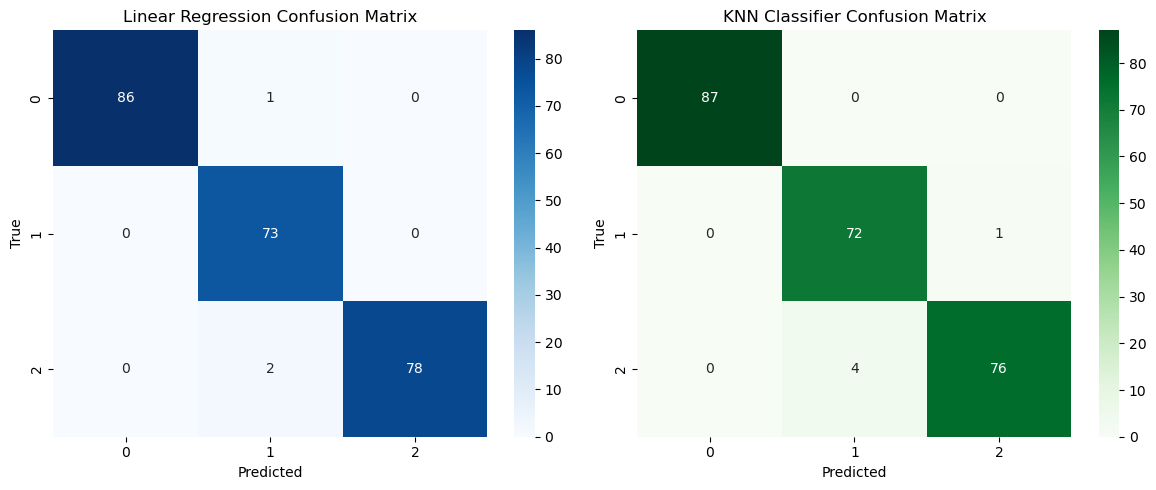

In [9]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Linear Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("KNN Classifier Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")
plt.tight_layout()
plt.show()

### Visualization

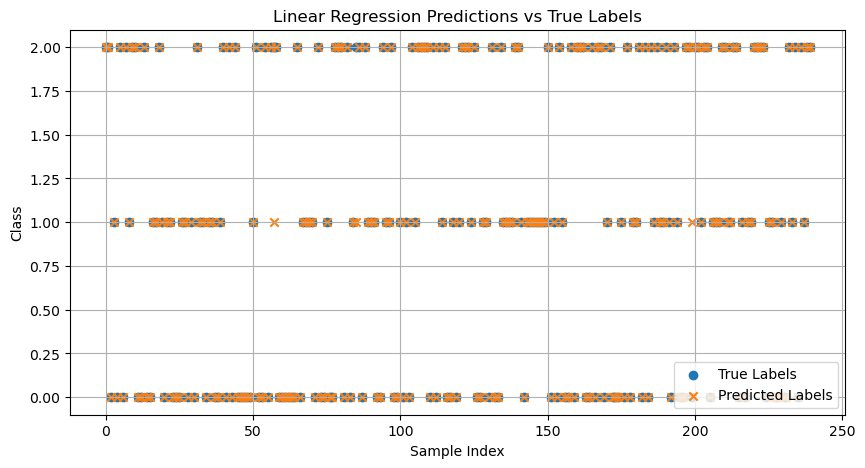

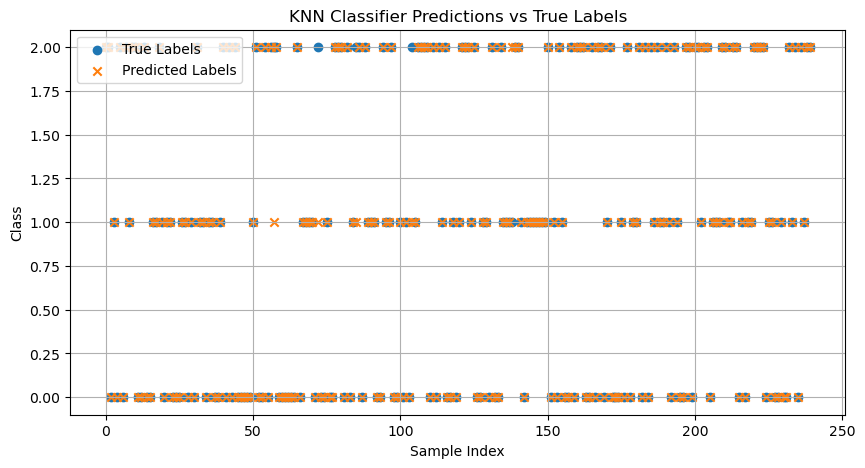

In [10]:
visualize_predictions(X_test, y_test, lr_preds, "Linear Regression")
visualize_predictions(X_test, y_test, knn_preds, "KNN Classifier")